# Определение перспективного тарифа для телеком-компании

Компания «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла

In [1]:
#импорт используемых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Прочитаем файлы и выведем общую информацию и первые строки таблиц

### Таблица `calls` (информация о звонках):
- **id** — уникальный номер звонка
- **call_date** — дата звонка
- **duration** — длительность звонка в минутах
- **user_id** — идентификатор пользователя, сделавшего звонок

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_calls.info()
data_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


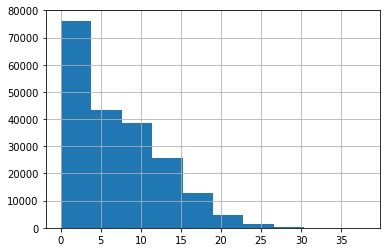

In [3]:
data_calls['duration'].hist()
plt.show()

### Таблица `messages` (информация о сообщениях):
- **id** — уникальный номер сообщения
- **message_date** — дата сообщения
- **user_id** — идентификатор пользователя, отправившего сообщение

In [4]:
data_msg = pd.read_csv('/datasets/messages.csv')
data_msg.info()
data_msg.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


### Таблица `internet` (информация об интернет-сессиях):
- **id** — уникальный номер сессии
- **mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах)
- **session_date** — дата интернет-сессии
- **user_id** — идентификатор пользователя

In [7]:
data_int = pd.read_csv('/datasets/internet.csv', index_col=0)
data_int.info()
data_int.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


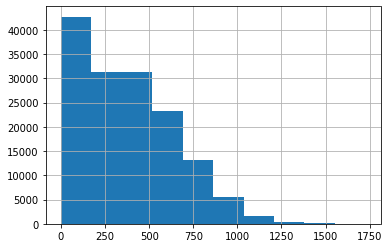

In [8]:
data_int['mb_used'].hist()
plt.show()

### Таблица `users` (информация о пользователях):
- **user_id** — уникальный идентификатор пользователя
- **first_name** — имя пользователя
- **last_name** — фамилия пользователя
- **age** — возраст пользователя (годы)
- **reg_date** — дата подключения тарифа (день, месяц, год)
- **churn_date** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- **city** — город проживания пользователя
- **tarif** — название тарифного плана

In [9]:
data_user = pd.read_csv('/datasets/users.csv')
data_user.info()
data_user.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Таблица `tariffs` (информация о тарифах):
- **tariff_name** — название тарифа
- **rub_monthly_fee** — ежемесячная абонентская плата в рублях
- **minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату
- **messages_included** — количество сообщений в месяц, включённых в абонентскую плату
- **mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- **rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- **rub_per_message** — стоимость отправки сообщения сверх тарифного пакета
- **rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [10]:
tariff = pd.read_csv('/datasets/tariffs.csv')
tariff.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод

Таблицы содержат информацию о включенных в тарифы пакетах, данные об абонентах и израсходованных пакетах по каждому абоненту. Значения пропущены только в одном столбце таблицы `users`. Будем считать, что, если в столбце нет информации о дате прекращения пользования тарифом, значит тариф еще действует, и такие пропуски ничем не заполняются. В столбцах с датами предстоит заменить тип данных `object` на `datetime`. Данные трафика интернета и длительности звонков содержат много нулевых значений 

## Предобработка данных

Известно, что каждый звонок округляется до целых минут, поэтому округлим значения в столце `duration` до целых в большую сторону

In [12]:
data_calls['duration'] = np.ceil(data_calls['duration']) #округление вверх

С помощью цикла заменим тип данных в столбцах с датами в таблицах `data_calls, data_msg, data_int` и добавим в каждую таблицу столбец с указанием номера месяца по каждому действию

In [13]:
tables = [data_calls, data_msg, data_int] #список таблиц
#цикл находит в наименовании столбцов каждой таблицы 'date', меняет тип данных столбца на 'datetime', создает новый столбец с
#номером месяца и выводит первые строки новой таблицы
for table in tables: 
    for name in table.columns: 
        if 'date' in name: 
            table[name] = pd.to_datetime(table[name], format='%Y-%m-%d')
            table['month'] = pd.DatetimeIndex(table[name]).month
            display(table.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Посчитаем общее количество отправленных смс, продолжительность звонком и использованный трафик интернета по каждому абоненту помесячно

In [14]:
#сводные таблицы по видам услуг по каждому абоненту помесячно
internet = data_int.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
messages = data_msg.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
calls = data_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc='sum')
internet

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

Объеденим сводные таблицы с помощью метода `reduce` с параметром `outer`, чтобы сохранить все строки таблиц

In [16]:
from functools import reduce
int_msg_call =  reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), [internet, messages, calls]).reset_index()
int_msg_call.columns = ['user_id', 'month', 'mb_used', 'msg_sent', 'duration']
int_msg_call.head()

,user_id,month,mb_used,msg_sent,duration
0,1000,5,2253.49,22.0,159.0
1,1000,6,23233.77,60.0,172.0
2,1000,7,14003.64,75.0,340.0
3,1000,8,14055.93,81.0,408.0
4,1000,9,14568.91,57.0,466.0


Известно, что оператор округляет значения использованного трафика за месяц в большую сторону до целых Гб. Переведем значения столбца `mb_used` в ГБ, округлим их в большую сторону и переименуем столбец 

In [17]:
int_msg_call['mb_used'] = (int_msg_call['mb_used'] / 1024).apply(np.ceil) #Мб в Гб и округление в большую сторону
int_msg_call = int_msg_call.rename(columns={'mb_used': 'gb_used'}) #переименование столбца

Добавим в сводную таблицу информацию по абонентам с помощью метода `merge`

In [18]:
data = int_msg_call.merge(data_user, on=['user_id'], how='outer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     3216 non-null   int64  
 1   month       3214 non-null   float64
 2   gb_used     3203 non-null   float64
 3   msg_sent    2717 non-null   float64
 4   duration    3174 non-null   float64
 5   age         3216 non-null   int64  
 6   churn_date  189 non-null    object 
 7   city        3216 non-null   object 
 8   first_name  3216 non-null   object 
 9   last_name   3216 non-null   object 
 10  reg_date    3216 non-null   object 
 11  tariff      3216 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 326.6+ KB


Так как не у всех абонентов есть информация по всем видам услуг в месяце, в таблице появились пропуски. Заменим пропуски на ноль и удалим две строки, где нет данных о месяце

In [19]:
data.loc[data['gb_used'].isna(), 'gb_used'] = 0
data.loc[data['msg_sent'].isna(), 'msg_sent'] = 0
data.loc[data['duration'].isna(), 'duration'] = 0
data.dropna(subset = ['month'], inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     3214 non-null   int64  
 1   month       3214 non-null   float64
 2   gb_used     3214 non-null   float64
 3   msg_sent    3214 non-null   float64
 4   duration    3214 non-null   float64
 5   age         3214 non-null   int64  
 6   churn_date  187 non-null    object 
 7   city        3214 non-null   object 
 8   first_name  3214 non-null   object 
 9   last_name   3214 non-null   object 
 10  reg_date    3214 non-null   object 
 11  tariff      3214 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 326.4+ KB


Добавим в таблицу данные о тарифе. Для этого приведем наименование столбца к единому виду

In [20]:
data = data.rename(columns={'tariff': 'tariff_name'})
data = data.merge(tariff, on=['tariff_name'], how='left') 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   float64
 2   gb_used                3214 non-null   float64
 3   msg_sent               3214 non-null   float64
 4   duration               3214 non-null   float64
 5   age                    3214 non-null   int64  
 6   churn_date             187 non-null    object 
 7   city                   3214 non-null   object 
 8   first_name             3214 non-null   object 
 9   last_name              3214 non-null   object 
 10  reg_date               3214 non-null   object 
 11  tariff_name            3214 non-null   object 
 12  messages_included      3214 non-null   int64  
 13  mb_per_month_included  3214 non-null   int64  
 14  minutes_included       3214 non-null   int64  
 15  rub_

Чтобы добавить в таблицу столбец с выручкой по каждому абоненту помесячно, напишем функцию

In [21]:
#функция находит разницу между включенным в тариф и израходованным пакетом по каждой услуге и высчитывает стоимость. 
#если значение отрицательно, значит лимит не израсходован перерасход равен 0
#возвращает сумму перерасхода и абонентской платы
def tariff_income(row):
    minutes_over = (row['duration'] - row['minutes_included']) * row['rub_per_minute']
    msg_over = (row['msg_sent'] - row['messages_included']) * row['rub_per_message']
    gb_over = (row['gb_used'] - row['mb_per_month_included'] / 1024) * row['rub_per_gb']
    
    if minutes_over < 0: 
        minutes_over = 0
    if msg_over < 0: 
        msg_over = 0
    if gb_over < 0: 
        gb_over = 0
        
    month_income = minutes_over + msg_over + gb_over + row['rub_monthly_fee']
    return month_income

data['income'] = data.apply(tariff_income, axis=1) #добавим столбец с выручкой
data.head() #первые строки новой таблицы

,user_id,month,gb_used,msg_sent,duration,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
0,1000,5.0,3.0,22.0,159.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6.0,23.0,60.0,172.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7.0,14.0,75.0,340.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8.0,14.0,81.0,408.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9.0,15.0,57.0,466.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0


### Вывод 
В результате предобработки данные были сгруппированы по каждому абоненту помесячно, рассчитаны израсходованные пакеты по каждому виду услуг и выручка. Значения дат были приведены к типу `datetime`, пропущенные значения заполнены нулем.

## Анализ поведения клиентов

Чтобы сравнить поведение клиентов с разными тарифами сгруппируем данные по каждому виду услуг

In [22]:
data.groupby('tariff_name').agg({'gb_used':'mean', 'msg_sent': 'mean', 'duration': 'mean', 'income': 'mean'})

,gb_used,msg_sent,duration,income
tariff_name,,,,
smart,16.328847,33.384029,417.934948,1289.973531
ultra,19.494416,49.363452,526.623350,2070.152284


In [23]:
tariff

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица показывает, что в среднем абоненты тарифного плана ULTRA расходуют больше, что обусловлено большим пакетом услуг, включенным в абонентскую плату, а плата за услуги редко превышает абонентску. Абоненты SMART расходуют меньше, но учитывая среднюю выручку в месяц, превышающую абонентскую плату более чем в два раза, в пакет услуг тарифа не укладываются. Построим сравнительные гистограммы по расходам абонентов разных тарифов

In [24]:
# переменная smart-сгруппированные данные по тарифу с интересующими нас столбцами

smart = data.query('tariff_name == "smart"')
smart = smart[['gb_used', 'msg_sent', 'duration', 'income']]

In [25]:
# переменная ultra-сгруппированные данные по тарифу с интересующими нас столбцами

ultra = data.query('tariff_name == "ultra"')
ultra = ultra[['gb_used', 'msg_sent', 'duration', 'income']]

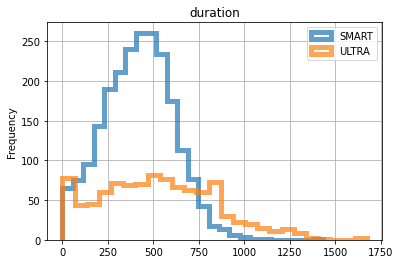

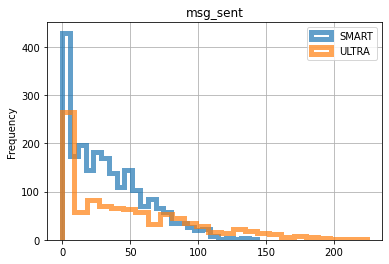

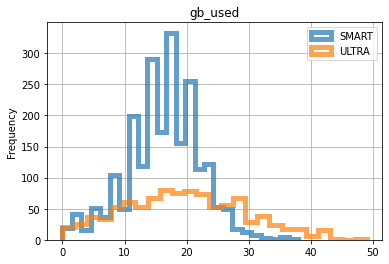

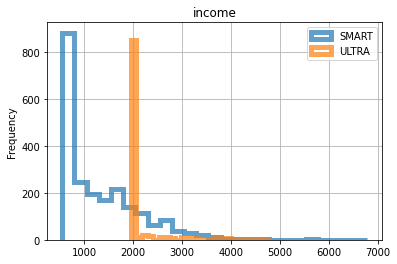

In [26]:
columns = ['duration', 'msg_sent', 'gb_used', 'income'] #цикл строит сравнительную гистограмму по выбранным столбцам

for column in columns:
    ax=smart.plot(kind='hist',
                         y=column, 
                         histtype='step',
                         bins=25,linewidth=5,
                         alpha=0.7,
                         label='SMART',
                        )
    ultra.plot(kind='hist',
                    y=column, 
                    title=column,
                    histtype='step',
                    bins=25,
                    linewidth=5,
                    alpha=0.7,
                    label='ULTRA',
                    ax=ax,
                    grid=True,
                    legend=True,
                   )


Рассчитаем дисперсию и рассмотрим расходы по тарифам более подробно. 

In [27]:
#описание таблицы

report_smart = smart.describe().T
report_smart['var'] = report_smart['std'] ** 2
report_smart

,count,mean,std,min,25%,50%,75%,max,var
gb_used,2229.0,16.328847,5.747061,0.0,13.0,17.0,20.0,38.0,33.028705
msg_sent,2229.0,33.384029,28.227876,0.0,10.0,28.0,51.0,143.0,796.812958
duration,2229.0,417.934948,190.313730,0.0,282.0,422.0,545.0,1435.0,36219.315784
income,2229.0,1289.973531,818.404367,550.0,550.0,1023.0,1750.0,6770.0,669785.708006


In [28]:
#описание таблицы

report_ultra = ultra.describe().T
report_ultra['var'] = report_ultra['std'] ** 2
report_ultra

,count,mean,std,min,25%,50%,75%,max,var
gb_used,985.0,19.494416,9.853511,0.0,12.0,19.0,27.0,49.0,97.091686
msg_sent,985.0,49.363452,47.804457,0.0,6.0,38.0,79.0,224.0,2285.266143
duration,985.0,526.623350,317.606098,0.0,284.0,518.0,752.0,1673.0,100873.633397
income,985.0,2070.152284,376.187114,1950.0,1950.0,1950.0,1950.0,4800.0,141516.745079


### Вывод 
Графики показывают что абоненты SMART в основном расходуют до 500 минут в месяц, которые включенты в аб. плату, пик рядом с отметкой 500 означает, что большому количеству абонентов едва хватает пакета минут, а значительная часть превышает лимит. Абоненты ULTRA расходуют больше минут, но абонентскую плату это не увеличивает. Учитывая разницу в количестве абонентов, можно сказать, что абоненты ULTRA более склонны отправлять смс, при этом значительной части абонентов этих тарифов в основном нужно несколько смс в месяц. По описанию и графику видно, что только около 25% абонентов тарифа SMART укладываются в пакет интернет-трафика, включенного в аб.плату, что в свою очередь влияет на расходы сверх аб.платы. Абонентам ULTRA не приходится переплачивать за трафик. По полученным можно сделать вывод что медианная выручка у SMART меньше, чем у ULTRA, но станд.отклонение больше более чем в два раза. Абоненты этого тарифа в том числе те, кто платит ощутимо больше медианной суммы, а значит привлекая бльше абонентов на тариф SMART, можно увеличить общий доход.

## Проверка гипотез

- Проверим гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Н0-Средняя выручка тарифов равна
Н1-Средняя выручка тарифов различается

In [29]:
alpha = 0.01  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(smart['income'], ultra['income'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Вероятность низка — по наблюдаемым данным можно сделать вывод, что, скорее всего, предположение всё-таки неверно.
Чтобы сравнить выручки по Москве и остальным городам, создадим два таблицы с группировкой по населенному пункту

- Проверим гипотезу, что средняя выручка пользователей тарифов абонентов Москвы и остальных городов различаются.
Н0-Средняя выручка по городу равна
Н1-Средняя выручка по городу различается

In [30]:
moscow = data.query('city == "Москва"')

In [31]:
around_moscow =  data.query('city != "Москва"')

In [32]:
alpha = 0.01  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(moscow['income'], around_moscow['income'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средняя выручка в Москве и других городах и неодинакова, это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками. 

Мы не использовали дополнительный параметр `equal_var = False`, потому что у нас достаточно большие и одинаковые по размеру выборки, к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.

### Вывод

Проверка гипотез показала, что скорее всего, средняя выручка никак не зависит от города, а выручка по разным тарифам различается.

# Вывод

По результатам проведенного анализа можно сделать вывод, что выгодно привлекать абонентов на тариф SMART независимо от города их проживания. Средняя выручка по городам примерно одинакова. Абоненты тарифа ULTRA расходуют больше минут, интернет-трафика и смс, при этом редко платят больше абонентской платы. Абоненты SMART, наоборот, в среднем расходуют меньше, но при этом часто не укладываются в пакет услуг, включенных в ежемесячную плату. Целесобразно привлекать новых абонентов тарифа SMART, в числе которых с большей вероятностью будут те, кто будет платить больше медианной суммы
